In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


In [6]:
df = pd.read_csv("../data/loan_data.csv")

print("\nData Preview:")
print(df.head())


Data Preview:
    Loan_ID  Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001003           1           6091.0         128              12.0   
1  LP001005           0           3000.0          66              12.0   
2  LP001006           0           4941.0         120              12.0   
3  LP001008           0           6000.0         141              12.0   
4  LP001013           0           3849.0          95              12.0   

   Credit_History  Loan_Status  
0               1            0  
1               1            1  
2               1            1  
3               1            1  
4               1            1  


In [7]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')


In [8]:
df = df.dropna(subset=['Dependents', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'])


In [11]:
features = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'

X = df[features]
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
           1       0.82      1.00      0.90        59

    accuracy                           0.84        82
   macro avg       0.91      0.72      0.75        82
weighted avg       0.87      0.84      0.82        82


ROC-AUC Score: 0.72


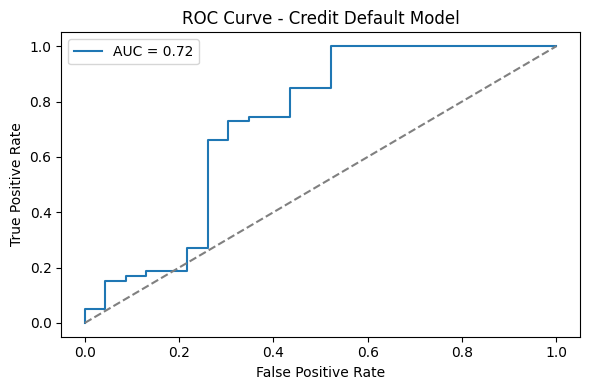

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.title("ROC Curve - Credit Default Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("../roc_curve.png")
plt.show()
